# Modules of essay grader

In [1]:
import os
import math
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pickle

from util import get_trained_model, preprocess_data

### Reading the data

/home/marin/Documents/Faks/3. semestar/Diplomski projekt/Egrader/util.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  set_i['avg_score']=set_i[rating_columns].mean(axis=1)
/home/marin/Documents/Faks/3. semestar/Diplomski projekt/Egrader/util.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  set_i['avg_score']=((set_i[rating_columns]-set_i[rating_columns].min())/(set_i[rating_columns].max()-set_i[rating_columns].min())).mean(axis=1)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9e89d0ecc0>],
      dtype=object)

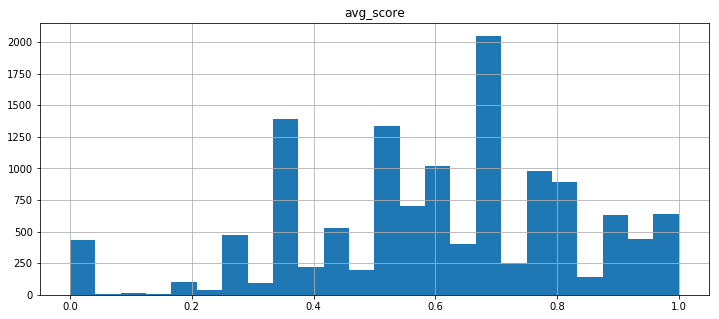

In [2]:
train_data = pd.read_table("data/training_set.tsv")
train_data = preprocess_data(train_data)
train_data.hist(column='avg_score', bins=24, ax= plt.figure(figsize = (12,5)).gca())

## Creating a model for each grader module

In [3]:
import sklearn.feature_extraction.text as te
import sklearn.model_selection as msel
import nltk
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model

x = train_data.essay
y = train_data.avg_score

### Content module

In [4]:
get_trained_model(x, y, "content")

MODULE: content
---Transforming module data
<class 'features.content.word_count.Feature'> [[0.175  0.2115 0.1415 ... 0.4175 0.288  0.237 ]]
<class 'features.content.trigrams.Feature'> [[0.30729167 0.29004329 0.40514469 ... 0.28542714 0.29282577 0.3729128 ]]
<class 'features.content.uncommon_words.Feature'> [[0.31759657 0.36518771 0.39593909 ... 0.38086304 0.39655172 0.39106145]]
<class 'features.content.unique_words.Feature'> [[0.54506438 0.50853242 0.62944162 ... 0.56097561 0.49507389 0.55027933]]
<class 'features.content.bigrams.Feature'> [[0.64935065 0.70842333 0.69871795 ... 0.56927711 0.5877193  0.69074074]]
---Tuning parameters
---best parameters: {'alpha': 1.0}
---Training module on whole dataset
---Dumping module
Model dumped into: models/content_module
---------------------------------


### Grammar module

In [5]:
#get_trained_model(x, y_scaled, "grammar")